<h1> Initialize, and Load Presaved HDE Coords </h1>

In [3]:
import os, pickle, time, glob, sys, copy
import numpy as np 
import scipy
import mdtraj as md 
import MDAnalysis as mda
import nglview as nv 
from ipywidgets import interactive, VBox
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import pyemma as py 
from pyemma.util.contexts import settings
import warnings
warnings.filterwarnings('ignore')

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1' 


import tensorflow as tf
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.tensorflow_backend.set_session(tf.Session(config=config))


import sys
from hde import *#__init__, hde, propagator, molgen, analysis #



source_folds = "/project2/andrewferguson/mikejones/AT-all_SRV_data/individual_trajectories/"
full_source_folds = "/project2/andrewferguson/mikejones/AT-all_SRV_data/full_trajectories/"
avail_srvs = [0,1,2,3,20,21,22,23]






##traj names



traj_names =[
"AT-all-implicit-dis-0-0_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-1_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-2_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-3_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-4_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-5_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-6_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-7_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-8_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-9_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-10_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-11_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-12_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-13_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-14_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-15_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-16_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-17_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-18_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-19_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-0_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-1_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-2_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-3_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-4_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-5_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-6_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-7_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-8_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-9_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-10_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-11_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-12_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-13_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-14_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-15_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-16_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-17_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-18_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-19_T-309_t-20_s-13e+09"
]

for i in avail_srvs:
    print(traj_names[i])

num_srvs = len(avail_srvs)
traj_frame_length = 250000
hde_coords = np.zeros((num_srvs*traj_frame_length, 5))
for i in range(num_srvs):
    hde_coords[i*traj_frame_length:(i+1)*traj_frame_length, :] = np.load(source_folds+str(avail_srvs[i])+"_full_srv.npy")


AT-all-implicit-dis-0-0_T-309_t-20_s-13e+09
AT-all-implicit-dis-0-1_T-309_t-20_s-13e+09
AT-all-implicit-dis-0-2_T-309_t-20_s-13e+09
AT-all-implicit-dis-0-3_T-309_t-20_s-13e+09
AT-all-implicit-hbr-0-0_T-309_t-20_s-13e+09
AT-all-implicit-hbr-0-1_T-309_t-20_s-13e+09
AT-all-implicit-hbr-0-2_T-309_t-20_s-13e+09
AT-all-implicit-hbr-0-3_T-309_t-20_s-13e+09


FileNotFoundError: [Errno 2] No such file or directory: '/project2/andrewferguson/mikejones/AT-all_SRV_data/individual_trajectories/0_full_srv.npy'

In [2]:
#earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)

lag = 12   # x 100 ps save rate = 1.2 ns
is_reversible = True

n_mix = 25
lag_prop = lag
lr_prop = 0.0001


hde = HDE(
    100, 
    n_components=6, 
    lag_time=lag,
    reversible=is_reversible, 
    n_epochs=300,
    learning_rate=0.0005,
    hidden_layer_depth=2,
    hidden_size=100,
    activation='tanh', 
    batch_size=20000,
    batch_normalization=True,
    #callbacks=[earlyStopping], 
    verbose=True
)

In [3]:
hde = pickle.load(open('pretrained_srvs/sm-5_k-0_lag-12_ep-20_AT-all_dist_309K_40-250000-190.pkl', 'rb'))

/home/joseph/anaconda3/envs/lss/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<h1> Initialize Propogator using trained weights </h1>

In [16]:
prop_scaler = pre.MinMaxScaler(feature_range=(0,1))
traj_prop = copy.deepcopy(hde_coords[:,:dim_prop])

if dim_prop==1:
    traj_prop_scaled = prop_scaler.fit_transform(traj_prop.reshape(-1, 1))
else:
    traj_prop_scaled = prop_scaler.fit_transform(traj_prop)

dim_prop = 2
traj_prop = copy.deepcopy(hde_coords[:,:dim_prop])
prop_scaler = pre.MinMaxScaler(feature_range=(0,1))

lag_time = 12   # x 100 ps save rate = 1.2 ns
is_reversible = True

n_mix = 25
lag_prop = lag_time
lr_prop = 0.0001



callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
]



In [17]:


prop = Propagator(
    traj_prop_scaled.shape[1], 
    n_components=n_mix, 
    lag_time=lag_prop, 
    batch_size=200000, 
    learning_rate=lr_prop, 
    n_epochs=20000,
    callbacks=callbacks,
    hidden_size=100,
    activation='relu'
)




from hde.propagator import get_mixture_loss_func
prop.model.compile(loss=get_mixture_loss_func(prop.input_dim, prop.n_components), optimizer=tf.keras.optimizers.Adam(lr=lr_prop))
prop.model.set_weights(pickle.load(open('prop_weights.pkl', 'rb')))




In [20]:
obj = prop_scaler.fit(traj_prop)
n_steps = 1000 #np.int(np.floor(np.float(hde_coords.shape[0])/np.float(lag_prop)))
n_traj = 5
synth_trajs_scaled = [prop.propagate(traj_prop_scaled[0].reshape(1,-1).astype(np.float32), n_steps).reshape(n_steps, -1) for item in range(n_traj)]
synth_trajs = [obj.inverse_transform(synth_trajs_scaled[i]) for i in range(n_traj)]

<h1> Initialize Generator Using Trained Weights </h1>

In [21]:
# ## (3) generator

x_train = traj_prop_scaled


xyz_scaler = pre.MinMaxScaler(feature_range=(-1,1))


numfeature = 100
y_train = np.zeros((num_srvs*traj_frame_length, numfeature))
for i in range(num_srvs):
    y_train[i*traj_frame_length:(i+1)*traj_frame_length, :] = np.load("individual_trajectories/"+str(avail_srvs[i])+"_full_features.npy")


molgen = MolGen(
    latent_dim=x_train.shape[1],
    output_dim=y_train.shape[1],
    batch_size=30000,
    noise_dim=50,
    n_epochs=2500,
    hidden_layer_depth=2,
    hidden_size=200,
    n_discriminator=5
)
def swish(x):
    return (K.sigmoid(x) * x)
molgen.generator = tf.keras.models.load_model('molgen_generator.h5', custom_objects={'swish': swish},compile=False)
molgen.discriminator = tf.keras.models.load_model('molgen_discriminator.h5', custom_objects={'swish': swish},compile=False)
molgen.is_fitted = True# need to override after loading to allow molgen.transform to proceed


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               10600     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
Total params: 70,900
Trainable params: 70,900
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               20600     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_

<h1> Test "Thermo" </h1>


In [26]:
#which psi_i
index = 0
synth_traj = molgen.transform(synth_trajs_scaled[index])

In [45]:
synth_traj.shape
y_train[:,15].shape

(1500000,)

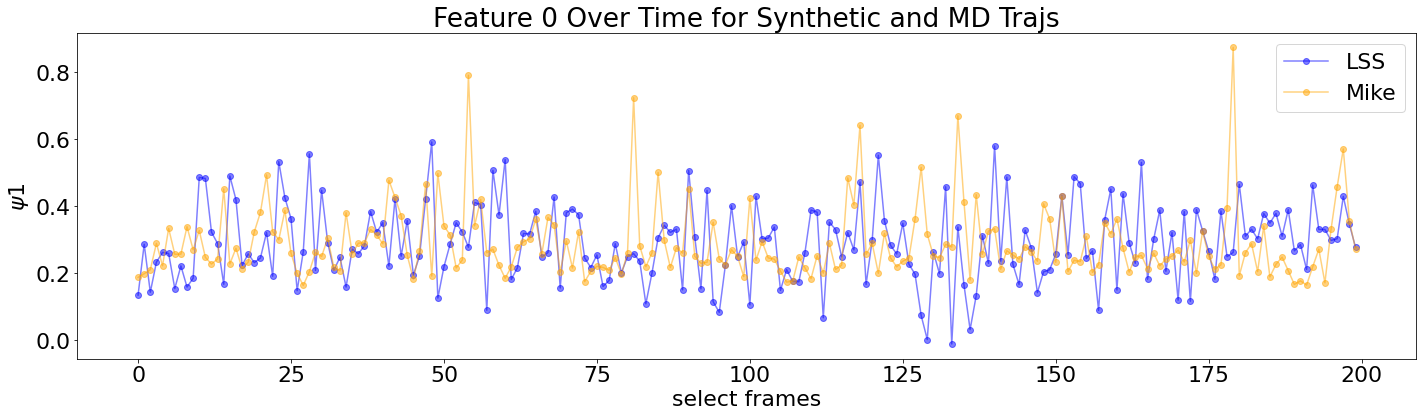

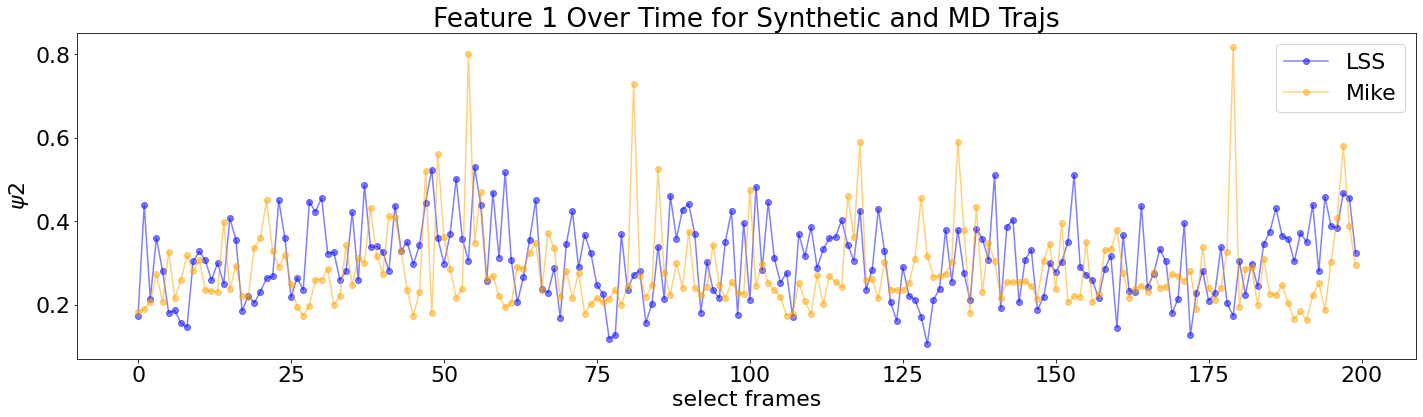

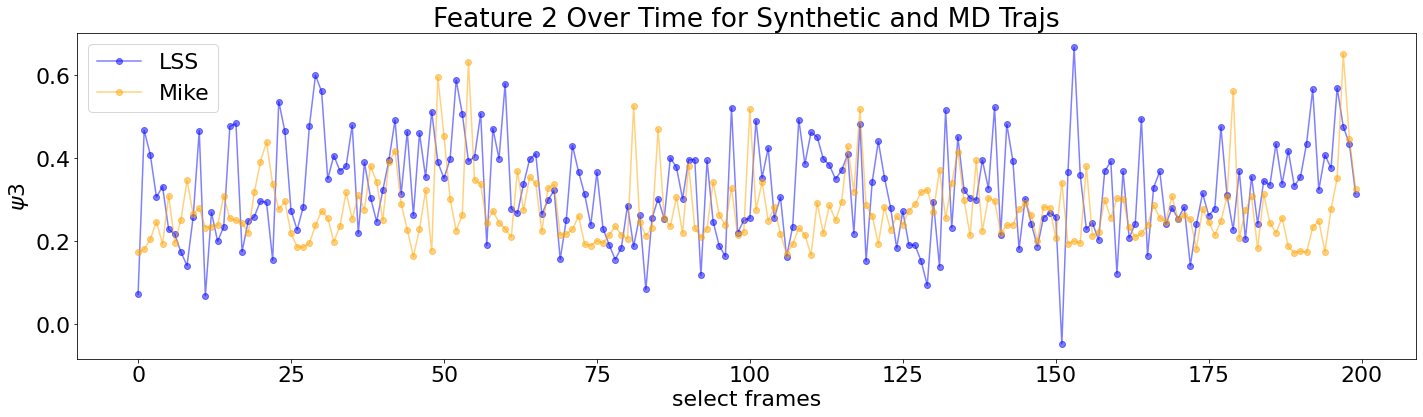

In [56]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)

for i in [0,1,2]:
    feature_id = i
    len_comp = 200
    fig, ax = plt.subplots(figsize=(24, 6))
    ax.plot(synth_traj[:len_comp,feature_id], color='blue', alpha=0.5, marker='o',label="LSS")
    temp = y_train[:len_comp*lag_prop,feature_id]
    ax.plot(temp[::lag_prop], color='orange', alpha=0.5, marker='o',label="Mike")
    ax.set_xlabel(r'select frames')
    ax.set_ylabel(r'$\psi$'+str(feature_id+1))
    ax.set_title("Feature " + str(feature_id) + " Over Time for Synthetic and MD Trajs")
    plt.legend()
    plt.show()

In [38]:
traj_prop.shape

(1500000, 2)

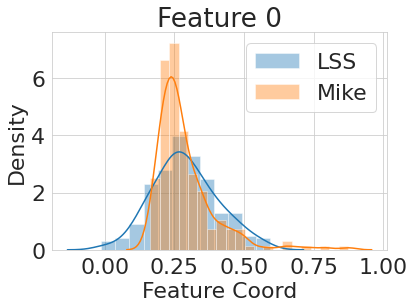

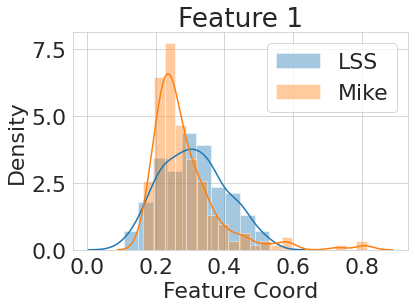

<Figure size 432x288 with 0 Axes>

In [85]:
n_bins = 50
import numpy as np
import seaborn as sns


for i in [0,1]:
    feature_id = i
    len_comp = 200
    #plt.hist(synth_traj[:len_comp,feature_id], bins=n_bins)
    sns.set_style('whitegrid')
    sns.distplot(synth_traj[:len_comp,feature_id], label="LSS")
    temp = y_train[:len_comp*lag_prop,feature_id]
    sns.distplot(temp[::lag_prop], label="Mike")
    plt.legend()
    plt.title("Feature "  + str(feature_id))
    plt.xlabel("Feature Coord")
    plt.ylabel("Density")
    plt.show()
plt.tight_layout()

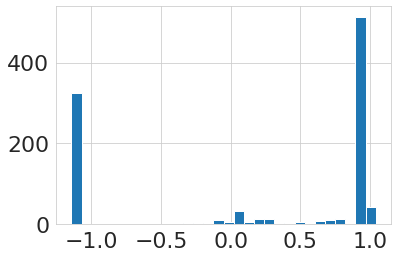

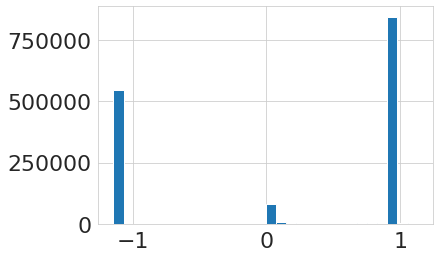

(array([325.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   2.,   2.,   9.,   5.,  32.,   5.,  12.,  13.,   1.,   3.,
          4.,   0.,   8.,  10.,  11.,   2., 514.,  41.]),
 array([-1.1429849 , -1.070147  , -0.99730915, -0.92447126, -0.85163337,
        -0.77879554, -0.70595765, -0.63311976, -0.56028193, -0.48744404,
        -0.41460618, -0.3417683 , -0.26893044, -0.19609256, -0.12325469,
        -0.05041683,  0.02242104,  0.09525891,  0.16809678,  0.24093466,
         0.31377253,  0.3866104 ,  0.45944825,  0.5322861 ,  0.605124  ,
         0.6779619 ,  0.7507997 ,  0.8236376 ,  0.8964755 ,  0.9693133 ,
         1.0421512 ], dtype=float32),
 <a list of 30 Patch objects>)

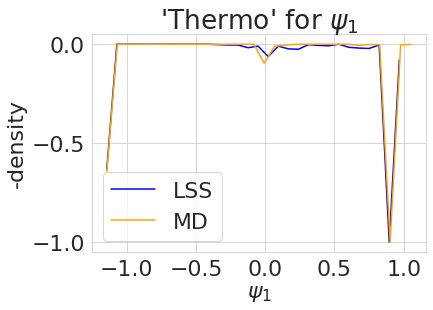

In [158]:
feature_id = 0
len_comp = 1000
a=plt.hist(synth_trajs[1][:len_comp,feature_id], label="LSS",bins = 30)
plt.show()
b=plt.hist(hde_coords[:, feature_id],bins =30)
plt.show()
temp = a[0]
temp = -np.interp(temp, (temp.min(), temp.max()), (0, 1))
temp2 = b[0]
temp2 = -np.interp(temp2, (temp2.min(), temp2.max()), (0, 1))
plt.show()
plt.plot(a[1][:-1],temp, color ="blue", label="LSS")
plt.plot(b[1][:-1], temp2, color = "orange", label="MD")
plt.legend()
plt.title("'Thermo' for $\psi_1$")
plt.ylabel("-density")
plt.xlabel("$\psi_1$")
len(a[0])
a

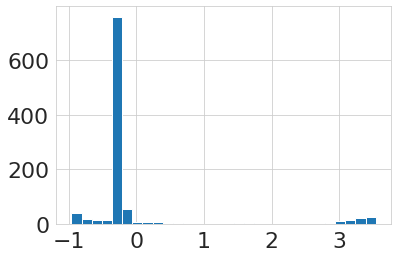

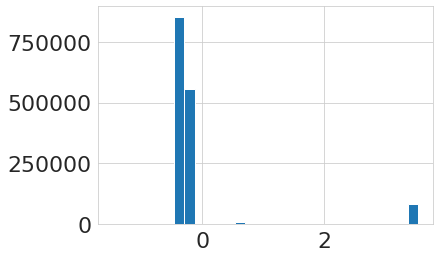

(array([ 40.,  16.,  15.,  13., 760.,  53.,   6.,   7.,   7.,   0.,   3.,
          0.,   1.,   0.,   0.,   0.,   2.,   3.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   2.,   9.,  14.,  23.,  24.]),
 array([-0.9579804 , -0.808073  , -0.6581656 , -0.5082581 , -0.3583507 ,
        -0.20844328, -0.05853586,  0.09137156,  0.24127898,  0.39118642,
         0.5410938 ,  0.69100124,  0.84090865,  0.9908161 ,  1.1407235 ,
         1.2906309 ,  1.4405384 ,  1.5904458 ,  1.7403532 ,  1.8902606 ,
         2.040168  ,  2.1900754 ,  2.339983  ,  2.4898903 ,  2.6397977 ,
         2.7897053 ,  2.9396126 ,  3.08952   ,  3.2394273 ,  3.389335  ,
         3.5392423 ], dtype=float32),
 <a list of 30 Patch objects>)

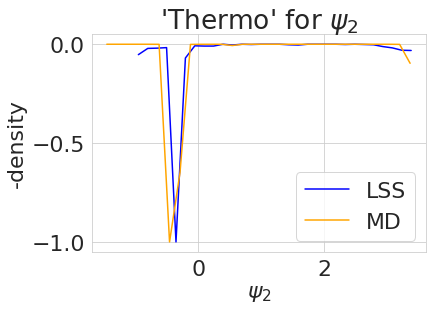

In [161]:
feature_id = 1
len_comp = 1000
a=plt.hist(synth_trajs[1][:len_comp,feature_id], label="LSS",bins = 30)
plt.show()
b=plt.hist(hde_coords[:, feature_id],bins =30)
plt.show()
temp = a[0]
temp = -np.interp(temp, (temp.min(), temp.max()), (0, 1))
temp2 = b[0]
temp2 = -np.interp(temp2, (temp2.min(), temp2.max()), (0, 1))
plt.show()
plt.plot(a[1][:-1],temp, color ="blue", label="LSS")
plt.plot(b[1][:-1], temp2, color = "orange", label="MD")
plt.legend()
plt.title("'Thermo' for $\psi_2$")
plt.ylabel("-density")
plt.xlabel("$\psi_2$")
len(a[0])
a

In [25]:
feature_id = 0
len_comp = 200
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(synth_traj[:len_comp,feature_id], color='blue', alpha=0.5, marker='o',label="Generated")
ax.plot(y_train[feature_id*250000:feature_id*250000 + len_comp,feature_id], color='orange', alpha=0.5, marker='o',label="Feature")
ax.set_xlabel(r'select frames')
ax.set_ylabel(r'$\psi$'+str(feature_id+1))
plt.legend()
plt.show()

125000